## Import Necessary Library

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [3]:
salary_data=pd.read_csv('SalaryData_Train(1).csv')
salary_data_test=pd.read_csv('SalaryData_Test(1).csv')

In [4]:
salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
salary_data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## Data Understanding

In [6]:
salary_data.shape

(30161, 14)

In [7]:
salary_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
salary_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [9]:
salary_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### Inference :
* The dataset have 14 features and 30161 records

* The dataset have no null values

* The datatype of the features are assigned correctly

## Data Visualization

In [10]:
def count_plot(salary_data, columns):
    plt.figure(figsize=(15, 10))
    for indx, var  in enumerate(columns):
        plt.subplot(5,3 , indx+1)
        g = sns.countplot(salary_data[var], hue= salary_data['Salary'])
    plt.tight_layout()
features = salary_data.columns.tolist()
features.remove('Salary')
features

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

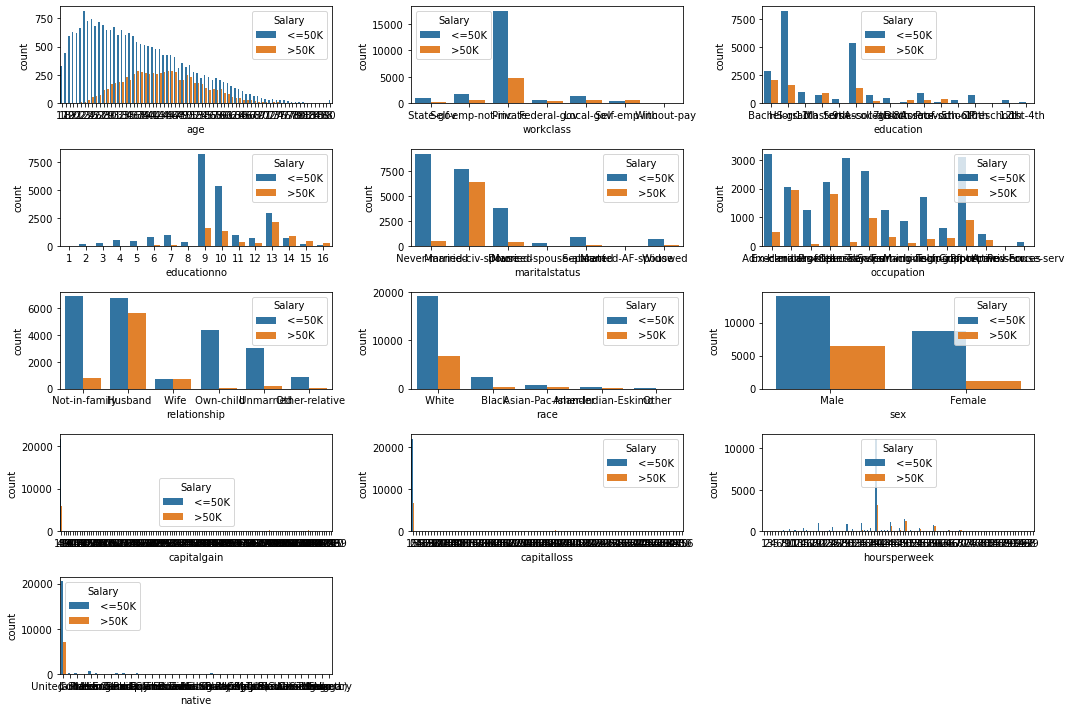

In [11]:
count_plot(salary_data,features)

## Data Preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
salary_data['workclass']=le.fit_transform(salary_data['workclass'])
salary_data['education']=le.fit_transform(salary_data['education'])
salary_data['maritalstatus']=le.fit_transform(salary_data['maritalstatus'])
salary_data['occupation']=le.fit_transform(salary_data['occupation'])
salary_data['relationship']=le.fit_transform(salary_data['relationship'])
salary_data['race']=le.fit_transform(salary_data['race'])
salary_data['sex']=le.fit_transform(salary_data['sex'])
salary_data['native']=le.fit_transform(salary_data['native'])
salary_data['Salary']=le.fit_transform(salary_data['Salary'])
salary_data.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [14]:
salary_data_test['workclass']=le.fit_transform(salary_data_test['workclass'])
salary_data_test['education']=le.fit_transform(salary_data_test['education'])
salary_data_test['maritalstatus']=le.fit_transform(salary_data_test['maritalstatus'])
salary_data_test['occupation']=le.fit_transform(salary_data_test['occupation'])
salary_data_test['relationship']=le.fit_transform(salary_data_test['relationship'])
salary_data_test['race']=le.fit_transform(salary_data_test['race'])
salary_data_test['sex']=le.fit_transform(salary_data_test['sex'])
salary_data_test['native']=le.fit_transform(salary_data_test['native'])
salary_data_test['Salary']=le.fit_transform(salary_data_test['Salary'])
salary_data_test.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [15]:
salary_data['Salary']

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

### Model building| Model training| Model testing| Model evaluation - GaussianNB

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
x=salary_data.iloc[:,:-1]
y=salary_data['Salary']

In [18]:
x_test=salary_data_test.iloc[:,:-1]
y_test=salary_data_test['Salary']

In [19]:
gb_model=GaussianNB().fit(x,y)

In [20]:
y_pred=gb_model.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report

array([[10759,   601],
       [ 2491,  1209]], dtype=int64)

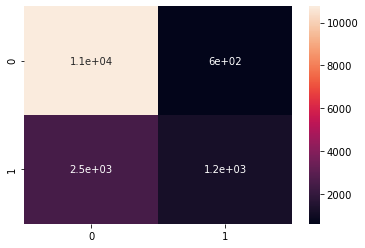

In [22]:
confu_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confu_matrix,annot=True)
confu_matrix

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



0.636925913589646


Text(0, 0.5, 'True Positive Rate')

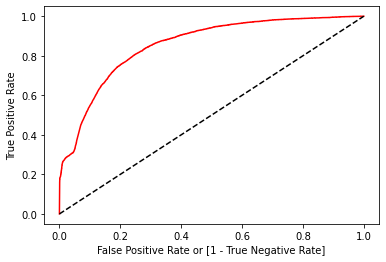

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, gb_model.predict_proba (x)[:,1])

auc = roc_auc_score(y_test, y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Model building| Model training| Model testing| Model evaluation - MultinomialNB

In [25]:
from sklearn.naive_bayes import MultinomialNB
mb_model=MultinomialNB().fit(x,y)

In [26]:
y_pred_mb=mb_model.predict(x_test)

In [27]:
print(confusion_matrix(y_test,y_pred_mb))

[[10891   469]
 [ 2920   780]]


In [28]:
print(classification_report(y_test,y_pred_mb))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



0.5847627997716026


Text(0, 0.5, 'True Positive Rate')

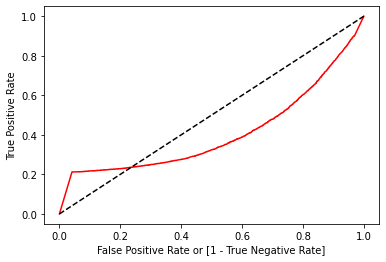

In [29]:
fpr, tpr, thresholds = roc_curve(y, mb_model.predict_proba (x)[:,1])

auc = roc_auc_score(y_test, y_pred_mb)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')